# Preprocesamiento y limpieza de datos

## Cargar Datos

Cargamos las librerias que vamos a utilizar

In [2]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el archivo _sign_mnist_train_clean.csv_ que corresponde a datos mas reales ubicado en la carpeta _sign_mnist_train_ 

In [3]:
train = pd.read_csv('./sign_mnist_train/sign_mnist_train_clean.csv')
train.head()

/tmp/ipykernel_10196/1261912574.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Cargamos el archivo _sign_mnist_test.csv_ que contiene los datos de prueba ubicado en la carpeta _sign_mnist_test_

In [4]:
test = pd.read_csv('./sign_mnist_test/sign_mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


## Analisis Exploratorio de los Datos

Visualicemos las clases con sus respectivas cantidades

/tmp/ipykernel_10196/1076942097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train, palette='Set2')


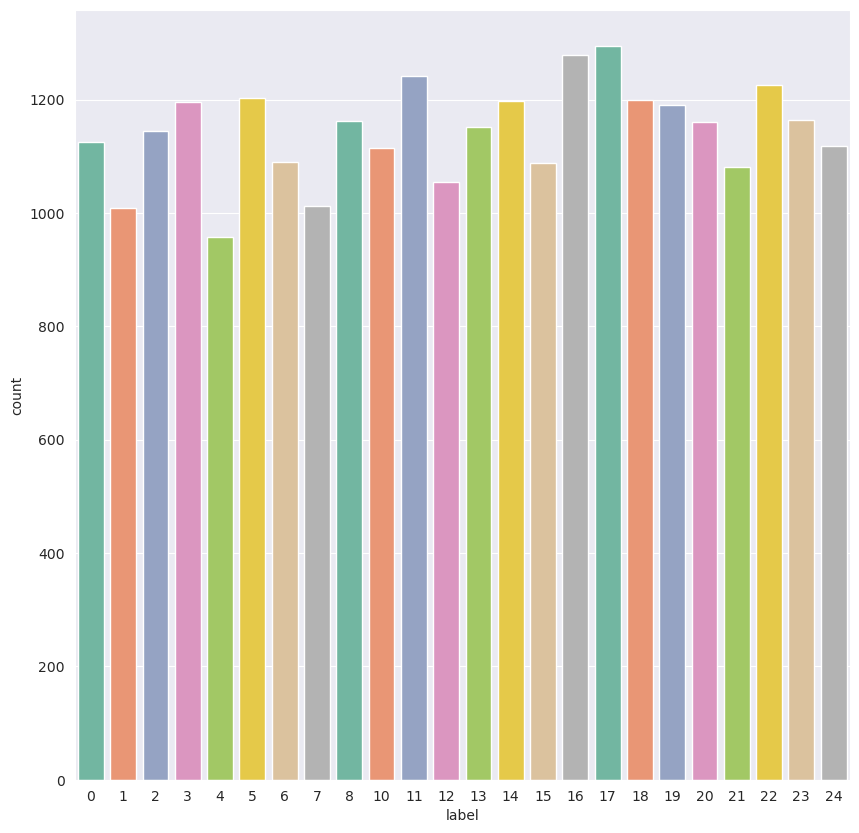

In [5]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='label', data=train, palette='Set2')
plt.show()

> Hay 24 clases pertenecientes a simbolos del lenguaje de señas.

> En promedio hay entre 900 y 1200 imagenes para cada clase.

> No es necesario balancearlas debido a que posee cantidad de imagenes similares.

Separamos las etiquetas de las imagenes.

In [6]:
y_train = train['label']
y_test = test['label']

Eliminamos las etiquetas del dataframe para dejar las imagenes sola.

In [7]:
del train['label']
del test['label']

Verifiquemos los datos del DataFrame train

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: object(784)
memory usage: 164.2+ MB


> El dataframe contiene 27454 imagenes.

> Tiene 784 columnas que corresponde a la cantidad de pixeles.

> Su peso es de 164.2 MB.

Verificamos el tipo de datos de cada columna

In [9]:
train.dtypes

pixel1      object
pixel2      object
pixel3      object
pixel4      object
pixel5      object
             ...  
pixel780    object
pixel781    object
pixel782    object
pixel783    object
pixel784    object
Length: 784, dtype: object

> Cada columna es de tipo object

Guardamos las etiquetas en una variable llamada labels 

In [10]:
# nueva variable con los labels
labels = y_train.values
labels

array([ 3,  6,  2, ..., 18, 17, 23])

Mostramos los valores de cada etiqueta

In [11]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Verificamos que las variables no tengan valores nulos

In [12]:
train.isnull().values.any()

np.False_

> No presenta variables con valores nulos.

Verificamos si hay imagenes duplicadas

In [13]:
train[train.duplicated()]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew
861,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


> Hay 4 imagenes en negro (el cero representa el negro)

> Hay 2 imagenes con texto en vez de enteros.

Vamos a eliminar estas imagenes de la BD.

In [14]:
train = train.drop(index=train[train.duplicated()].index.to_list())
train.shape

(27449, 784)

> Pasamos de 27454 a 27449 lo que indica que se eliminaron las imagenes correctamente.

Verificamos que ho hayan mas imagenes con valores de texto.

In [15]:
train[train['pixel1'] == 'fwefew']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
727,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,...,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew,fwefew


Eliminamos la imagen encontrada

In [16]:
train = train.drop(index=727)

In [17]:
train.shape

(27448, 784)

> Se verifica que la imagen ha sido eliminada correctamente

Convertimos los datos object a int

In [18]:
train = train.astype(str).astype(int)

Verificamos que se haya hecho la conversion correctamente

In [19]:
train.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 784, dtype: object